In [2]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

/vol/bitbucket/fms119/miniconda3/envs/modern_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

sizes = [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000]

from zijing_main import *

def get_fid(file_path):
    data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                           'samples/cirfar10_true_10000.npz')
    data_samples = data['images'].transpose(0,3,1,2)
    data_samples = np.interp(data_samples, (data_samples.min(), data_samples.max()), (0, 1))

    data = np.load(file_path)

    gen_samples = data['images'].transpose(0,3,1,2)
    gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()), (0, 1))

    fid = compute_fid_nchw(data_samples, gen_samples)
    return fid

# fid_trails = np.zeros((len(sizes),5))

# for i, n in enumerate(sizes):
#     for j, trial in enumerate(['a', 'b', 'c', 'd', 'e']):
#         print(f'{i} out of {len(sizes)}')
#         file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_{n}{trial}.npz'
#         fid = get_fid(file_path)
#         print(fid)
#         fid_trails[i, j] = fid

# np.savez('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/trial_fids.npz', fid_trails=fid_trails)

/vol/bitbucket/fms119/miniconda3/envs/modern_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-07-21 22:48:47.409064: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
sizes = [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000]

(4, 3, 32, 32)
(4, 32, 32, 3)
1.0
0.0


IndexError: index 4 is out of bounds for axis 0 with size 4

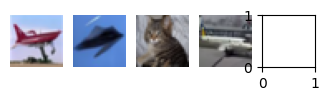

In [5]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_2000.npz')
images = data['x']
data = np.load(f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_{15000}{trial}.npz')
images = data['images']

print(images.shape)

# Number of rows/columns in the grid
grid_size = 10

# Create a new figure
plt.figure(figsize=(8,8))

if images.shape[1]==3:
    images = images.transpose(0,2,3,1)

images  = np.interp(images, (images.min(), images.max()), (0, 1))

print(images.shape)
print(images.max())
print(images.min())

# Loop over the images
for i in range(grid_size * grid_size):
    # Create a subplot for each image
    plt.subplot(grid_size, grid_size, i+1)
    # Display the image
    random_image = np.random.randint(0, images.shape[0])
    plt.imshow(images[i])
    # Remove the axes
    plt.axis('off')

# Show the figure
plt.show()

In [4]:
from zijing_main import *

def get_fid(file_path):
    data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                           'samples/cirfar10_true_10000.npz')
    data_samples = data['images'].transpose(0,3,1,2)
    data_samples = np.interp(data_samples, (data_samples.min(), data_samples.max()), (0, 1))

    data = np.load(file_path)

    gen_samples = data['images'].transpose(0,3,1,2)
    gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()), (0, 1))

    fid = compute_fid_nchw(data_samples, gen_samples)
    return fid

In [ ]:
fid_trails = np.zeros((len(sizes),5))

for i, n in enumerate(sizes):
    for j, trial in enumerate(['a', 'b', 'c', 'd', 'e']):
        print(f'{i} out of {len(sizes)}')
        file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_{n}{trial}.npz'
        fid = get_fid(file_path)
        print(fid)
        fid_trails[i, j] = fid

In [12]:
sizes = [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000]

fid_trails_data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/trial_fids.npz')
fid_trails = fid_trails_data['fid_trails']

In [27]:
fid_trails.mean(axis=1)

array([53.2233283 , 11.44067814,  4.06621521,  1.79923233,  0.70757867,
        0.26859702,  0.88674567, 27.58314054,  0.55007689,  1.32063822])

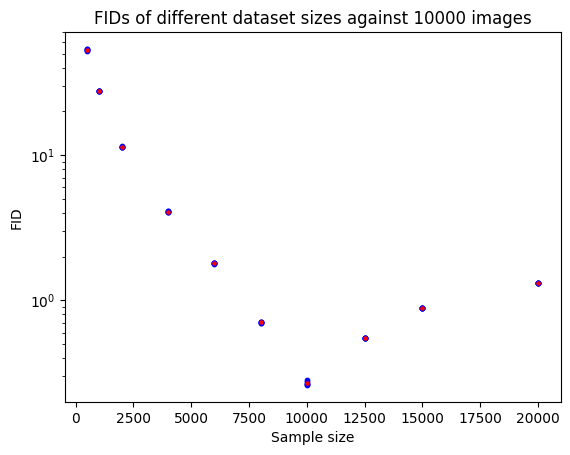

In [31]:
plt.scatter(sizes*5, fid_trails[:].T.reshape(-1), s=10, c='b')
plt.scatter(sizes, fid_trails.mean(axis=1), s=5, c='r')
plt.yscale('log')
plt.yscale('log')
plt.title('FIDs of different dataset sizes against 10000 images')
plt.ylabel('FID')
plt.xlabel('Sample size')
plt.show()

In [90]:
fids[np.argsort(sizes)]

array([53.31869167, 27.50197484, 11.48619846,  4.07356063,  1.78240594,
        0.71372532,  0.2734838 ,  0.54584583,  0.88571727,  1.32094026])

In [91]:
sizes

array([  500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500,
       20000])

In [1]:
import numpy as np
file_path = '/vol/bitbucket/fms119/score_sde_pytorch/experiment_results/fid_sample_size.npz'
data = np.load(file_path)
sizes = data['sizes']
fids = data['fids']

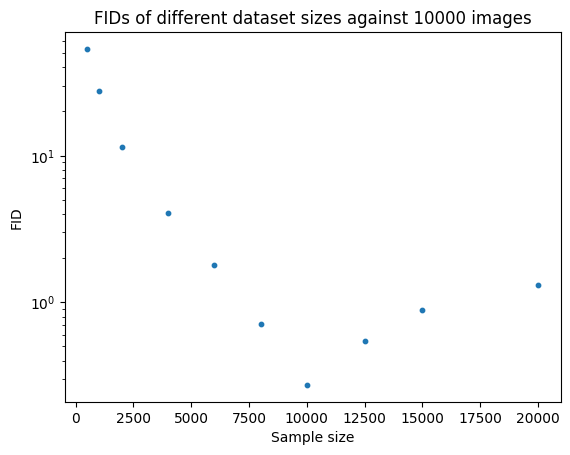

In [105]:
plt.scatter(sizes, fids, s=10)
# plt.xscale('log')
plt.yscale('log')
plt.title('FIDs of different dataset sizes against 10000 images')
plt.ylabel('FID')
plt.xlabel('Sample size')
plt.show()

In [96]:
file_path = '/vol/bitbucket/fms119/score_sde_pytorch/experiment_results/fid_sample_size.npz'
sizes = np.array(sizes)
fids = np.array(fids)

np.savez(file_path,
         sizes=sizes,
         fids=fids)

In [99]:
np.set_printoptions(suppress=True)
print(np.array((sizes, fids)).T[1:])
np.set_printoptions(suppress=False)

[[ 2000.            11.48619846]
 [ 4000.             4.07356063]
 [ 6000.             1.78240594]
 [ 8000.             0.71372532]
 [10001.             0.2734838 ]
 [15000.             0.88571727]
 [ 1000.            27.50197484]
 [12500.             0.54584583]
 [20000.             1.32094026]]


In [108]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_0.npz')
images = data['images']